In [12]:
!pip install transformers
!pip install transformers[sentencepiece]
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 11.0 MB/s eta 0:00:00


In [13]:
import transformers

In [16]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I work at EKU as a product planning manager",
        "Not the best job in the world",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9634761214256287},
 {'label': 'NEGATIVE', 'score': 0.9997543692588806}]

In [18]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

D:\ana\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\член\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [24]:
raw_inputs = [
        "I work at EKU as a product planning manager",
        "Not the best job in the world",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  1045,  2147,  2012, 23969,  2226,  2004,  1037,  4031,  4041,
          3208,   102],
        [  101,  2025,  1996,  2190,  3105,  1999,  1996,  2088,   102,     0,
             0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}

In [22]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [26]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 12, 768])


In [30]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [32]:
print(outputs.logits.shape)

torch.Size([2, 2])


In [34]:
print(outputs.logits)

tensor([[ 1.7685, -1.5040],
        [ 4.5946, -3.7167]], grad_fn=<AddmmBackward0>)


In [36]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[9.6348e-01, 3.6524e-02],
        [9.9975e-01, 2.4566e-04]], grad_fn=<SoftmaxBackward0>)


In [38]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [40]:
from transformers import BertConfig, BertModel

config = BertConfig()

model = BertModel(config)

In [44]:
config

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.52.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [46]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

In [48]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

D:\ana\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\член\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, inst

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [50]:
model.save_pretrained("model")

In [52]:
sequences = ["I", "Love", "You"]

In [54]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [56]:
import torch

model_inputs = torch.tensor(encoded_sequences)

In [58]:
output = model(model_inputs)

In [60]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9394e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6914e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1971e-03]],

        [[ 3.6436e-01,  3.2464e-02,  2.0258e-01,  ...,  6.0111e-02,
           3.2451e-01, -2.0996e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4876e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1116e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1320e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6061e-02,
           3.3564e-01,  2

In [66]:
tokenized_text = "Pinocio is not a real boy".split()
print(tokenized_text)

['Pinocio', 'is', 'not', 'a', 'real', 'boy']


In [68]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [76]:
tokenizer("I don't know what I'm doing")

{'input_ids': [101, 146, 1274, 112, 189, 1221, 1184, 146, 112, 182, 1833, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [78]:
sequence = "I don't know what I'm doing"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['I', 'don', "'", 't', 'know', 'what', 'I', "'", 'm', 'doing']


In [80]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[146, 1274, 112, 189, 1221, 1184, 146, 112, 182, 1833]


In [84]:
decoded_string = tokenizer.decode([146, 1274, 112, 189, 1221, 1184, 146, 112, 182, 1833])
print(decoded_string)

I don ' t know what I ' m doing


In [94]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "That is test to get an error"

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(ids)
try:
    model(input_ids)
except Exception as exc:
    print(exc)

too many indices for tensor of dimension 1


In [96]:
tokenized_inputs = tokenizer(sequence, return_tensors="pt")
print(tokenized_inputs["input_ids"])

tensor([[ 101, 2008, 2003, 3231, 2000, 2131, 2019, 7561,  102]])


In [100]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "Here we won't get any mistake"

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[2182, 2057, 2180, 1005, 1056, 2131, 2151, 6707]])
Logits: tensor([[-2.3275,  2.5398]], grad_fn=<AddmmBackward0>)


In [108]:
padding_id = 100

batched_ids = [
    [200, 200, 200],
    [200, 200, padding_id],
]

In [111]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


In [113]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


In [125]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "Here we won't get any mistake."

model_inputs = tokenizer(sequence)

In [129]:
sequence = "Here we won't get any mistake."

model_inputs = tokenizer(sequence)
sequences = ["Here we won't get any mistake.", "I wish we won't!"]

model_inputs = tokenizer(sequences)

In [131]:
model_inputs = tokenizer(sequences, padding="longest")

model_inputs = tokenizer(sequences, padding="max_length")

model_inputs = tokenizer(sequences, padding="max_length", max_length=8)

In [133]:
sequences = ["Here we won't get any mistake.", "I wish we won't!"]

model_inputs = tokenizer(sequences, truncation=True)

model_inputs = tokenizer(sequences, max_length=8, truncation=True)

In [135]:
sequences = ["Here we won't get any mistake.", "I wish we won't!"]

model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")

model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")

model_inputs = tokenizer(sequences, padding=True, return_tensors="np")

In [137]:
sequence = "Here we won't get any mistake."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[101, 2182, 2057, 2180, 1005, 1056, 2131, 2151, 6707, 1012, 102]
[2182, 2057, 2180, 1005, 1056, 2131, 2151, 6707, 1012]


In [139]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] here we won't get any mistake. [SEP]
here we won't get any mistake.


In [141]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["Here we won't get any mistake.", "I wish we won't!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)

# Tests from 
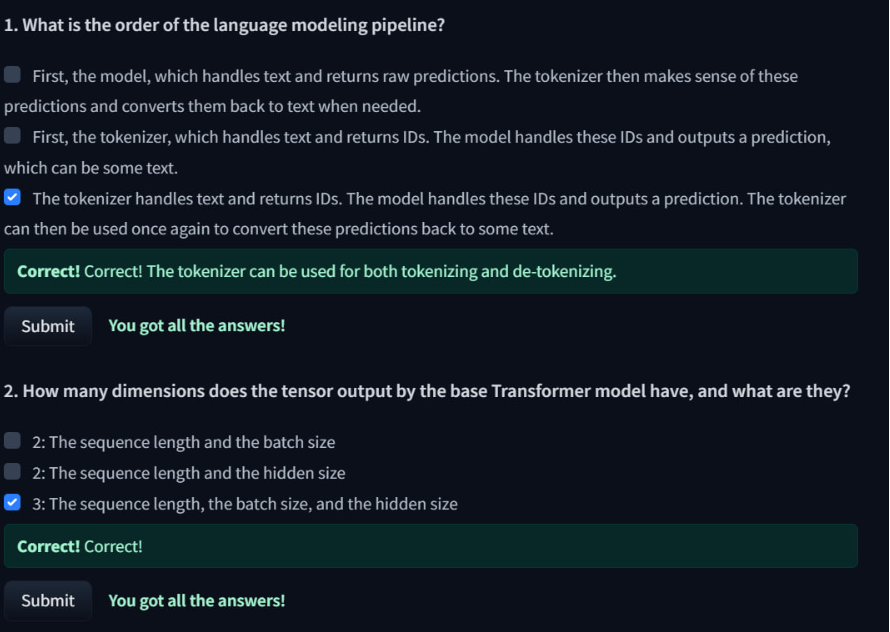
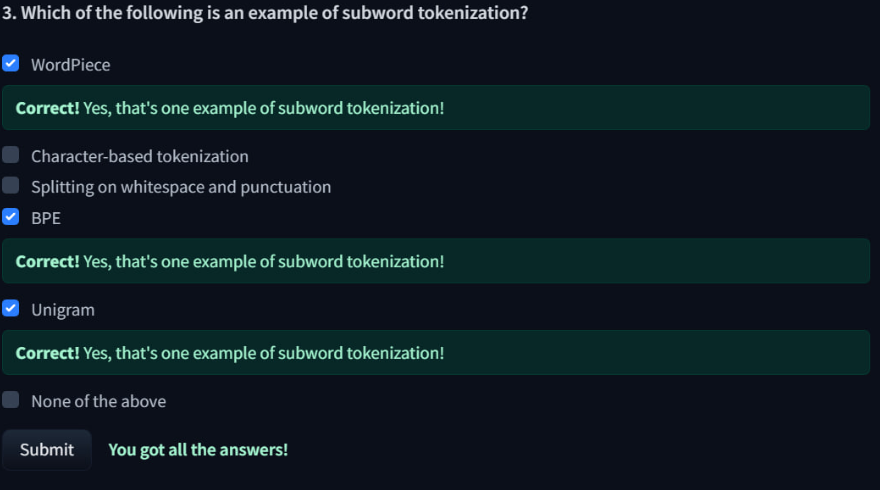
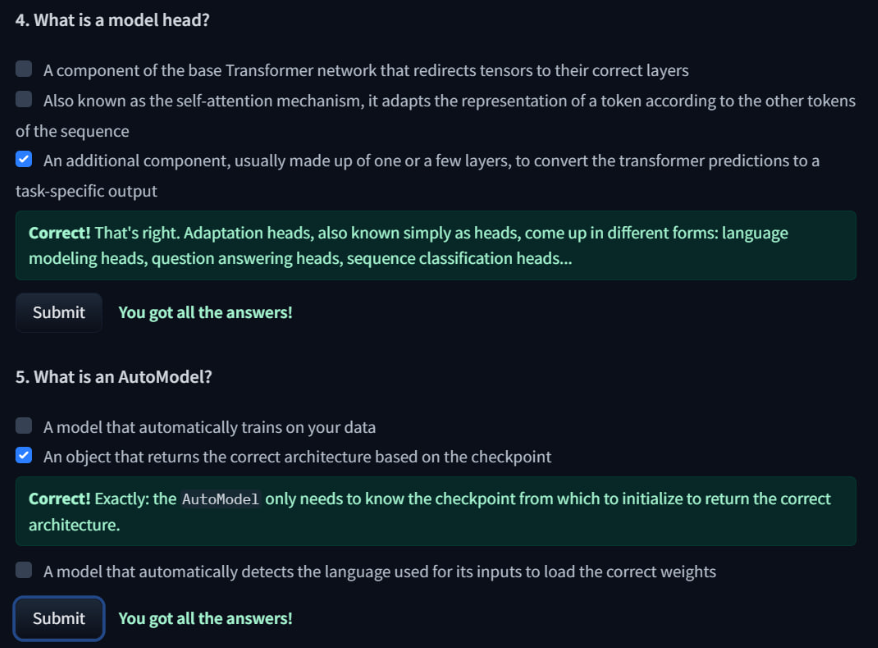
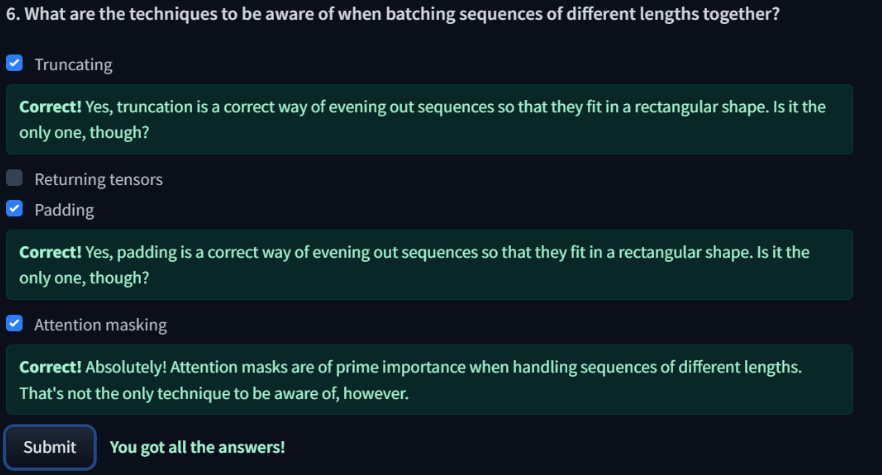
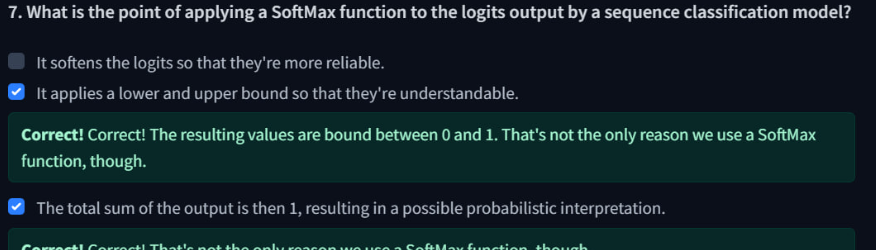
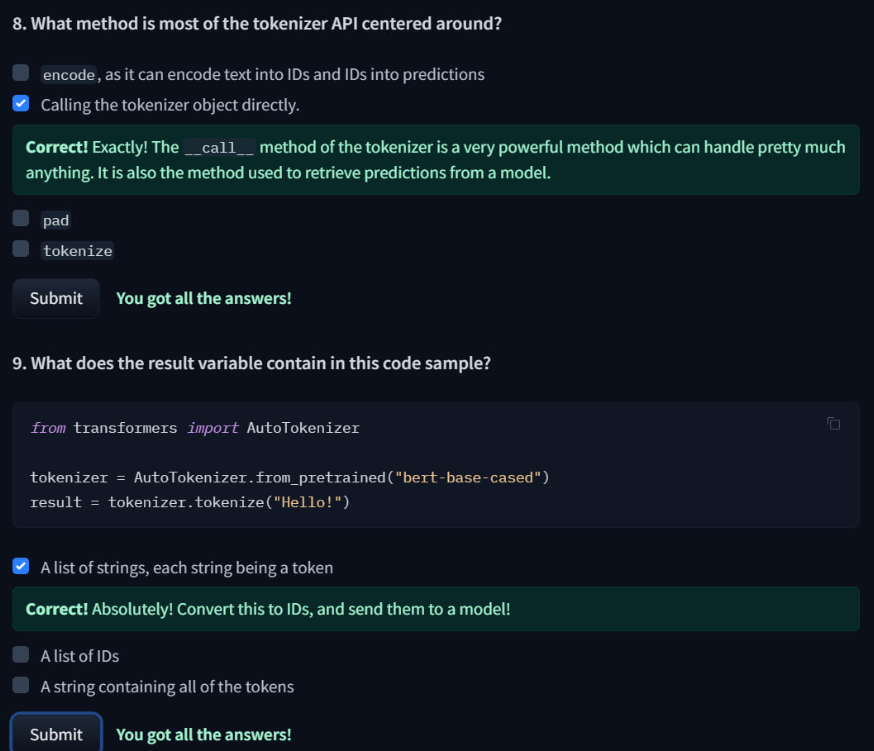
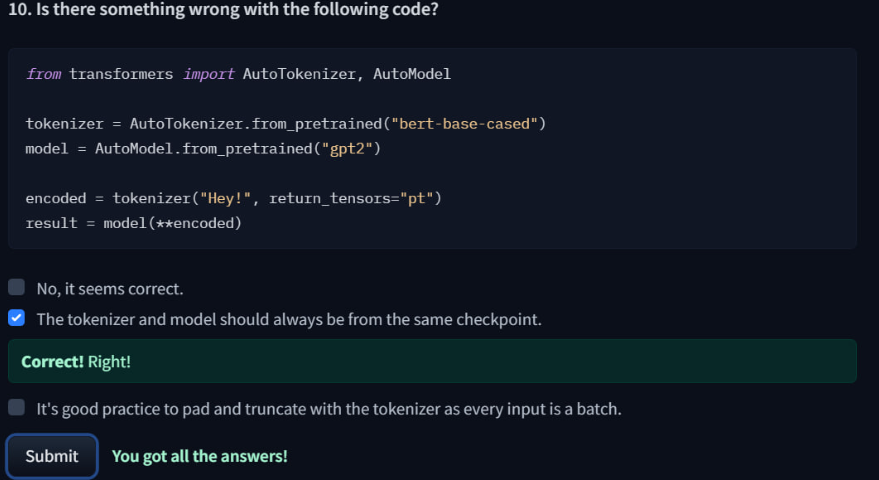